random forest

In [93]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Đọc dữ liệu từ file CSV
train_data = pd.read_csv("new_train_file.csv")
val_data = pd.read_csv("new_val_file.csv")
test_data = pd.read_csv('new_test_file.csv')

X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_val = val_data.drop('label', axis=1)
y_val = val_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

Random Forest

In [99]:
# Khởi tạo mô hình Random Forest
n_estimators=100
criterion="entropy"
max_features=9

randomForestClassifier = RandomForestClassifier(
    random_state=42,
    n_estimators=n_estimators, 
    criterion=criterion, 
    max_features=max_features,
    )

# Huấn luyện mô hình
randomForestClassifier.fit(X_train, y_train)

# Đánh giá hiệu suất mô hình
y_pred = randomForestClassifier.predict(X_train)
train_randomForestClassifier = accuracy_score(y_train, y_pred)
print("Độ chính xác tren tap train:", train_randomForestClassifier)

y_pred = randomForestClassifier.predict(X_val)
val_randomForestClassifier = accuracy_score(y_val, y_pred)
print("Độ chính xác tren tap val:", val_randomForestClassifier)

y_pred = randomForestClassifier.predict(X_test)
test_randomForestClassifier = accuracy_score(y_test, y_pred)
print("Độ chính xác tren tap test:", test_randomForestClassifier)
#save the model
pickle.dump(randomForestClassifier, open('weights/randomforest.pkl', 'wb'))

Độ chính xác tren tap train: 0.9832047208352247
Độ chính xác tren tap val: 0.8761343012704175
Độ chính xác tren tap test: 0.8660916931457104


bagging decision tree

In [36]:
# # Khởi tạo mô hình Bagging Decision Tree
# n_estimators = 100  # Số lượng cây quyết định
# base_estimator = DecisionTreeClassifier()  # Cây quyết định cơ bản
# bagging_model = BaggingClassifier(estimator=base_estimator, n_estimators=n_estimators)

# # Huấn luyện mô hình
# bagging_model.fit(X_train, y_train)

# # Dự đoán cho tập kiểm tra
# y_pred = bagging_model.predict(X_val)

# # Đánh giá hiệu suất mô hình
# accuracy = accuracy_score(y_val, y_pred)
# print("Độ chính xác:", accuracy)

# # Lưu mô hình
# pickle.dump(bagging_model, open('weights/bagging_model.pkl', 'wb'))

Độ chính xác: 0.8774954627949183


Gradient Boosting

In [100]:
# Khởi tạo mô hình Gradient Boosting
loss = 'log_loss'
n_estimators = 100
learning_rate = 0.1
subsample = 1
criterion = 'friedman_mse'
max_depth = 11
max_features = 8


gb_model = GradientBoostingClassifier(
    random_state=42,
    n_estimators=n_estimators, 
    learning_rate=learning_rate, 
    subsample=subsample, 
    max_depth=max_depth,
    max_features=max_features,
    )

# Huấn luyện mô hình
gb_model.fit(X_train, y_train)

# Đánh giá hiệu suất mô hình
y_pred = gb_model.predict(X_train)
train_gb = accuracy_score(y_train, y_pred)
print("Độ chính xác tren tap train:", train_gb)

y_pred = gb_model.predict(X_val)
val_gb = accuracy_score(y_val, y_pred)
print("Độ chính xác tren tap val:", val_gb)

y_pred = gb_model.predict(X_test)
test_gb = accuracy_score(y_test, y_pred)
print("Độ chính xác tren tap test:", test_gb)

# Lưu mô hình
pickle.dump(gb_model, open('weights/gradient_boosting_model.pkl', 'wb'))

Độ chính xác tren tap train: 0.9832047208352247
Độ chính xác tren tap val: 0.8761343012704175
Độ chính xác tren tap test: 0.8624602814344077


In [101]:
# Khởi tạo mô hình XGBoost
n_estimators = 100  # Số lượng cây quyết định
learning_rate = 0.6  # Tốc độ học tập
max_depth = 7  # Độ sâu tối đa của cây

xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth,
    )

# Huấn luyện mô hình
xgb_model.fit(X_train, y_train)

# Đánh giá hiệu suất mô hình
y_pred = xgb_model.predict(X_train)
train_xgb = accuracy_score(y_train, y_pred)
print("Độ chính xác tren tap train:", train_xgb)

y_pred = xgb_model.predict(X_val)
val_xgb = accuracy_score(y_val, y_pred)
print("Độ chính xác tren tap val:", val_xgb)

y_pred = xgb_model.predict(X_test)
test_xgb = accuracy_score(y_test, y_pred)
print("Độ chính xác tren tap test:", test_xgb)

# Lưu mô hình
pickle.dump(xgb_model, open('weights/xgboost_model.pkl', 'wb'))

Độ chính xác tren tap train: 0.9818429414434862
Độ chính xác tren tap val: 0.8924682395644283
Độ chính xác tren tap test: 0.8865183840217885


KNN

In [102]:
train_data_1 = train_data.copy()
val_data_1 = val_data.copy()
test_data_1 = test_data.copy()

# Separate features and target variable
features_to_scale = ['area', 'x', 'y', 'khoang_cach']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the features
scaled_train = scaler.fit_transform(train_data_1[features_to_scale])
pickle.dump(scaler, open('weights/scaler.pkl', 'wb'))
# Modify train_data_1
train_data_1.drop(features_to_scale, axis=1, inplace=True)
train_data_1 = pd.concat([pd.DataFrame(scaled_train, columns=features_to_scale), train_data_1], axis=1)
# Modify val_data_1
scaled_val = scaler.transform(val_data_1[features_to_scale])
val_data_1.drop(features_to_scale, axis=1, inplace=True)
val_data_1 = pd.concat([pd.DataFrame(scaled_val, columns=features_to_scale), val_data_1], axis=1)
# Modify test_data_1
scaled_val = scaler.transform(test_data_1[features_to_scale])
test_data_1.drop(features_to_scale, axis=1, inplace=True)
test_data_1 = pd.concat([pd.DataFrame(scaled_val, columns=features_to_scale), test_data_1], axis=1)
# Create X_train y_train, X_val, y_val
X_train_1 = train_data_1.drop('label', axis=1)
y_train_1 = train_data_1['label']

X_val_1 = val_data_1.drop('label', axis=1)
y_val_1 = val_data_1['label']

X_test_1 = test_data_1.drop('label', axis=1)
y_test_1 = test_data_1['label']



In [107]:
# Khởi tạo mô hình KNN
n_neighbors = 3  # Số lượng láng giềng gần nhất
metric = 'minkowski'  # Hàm đo khoảng cách
weights = 'distance'
p=1
knn_model = KNeighborsClassifier(
    n_neighbors=n_neighbors, 
    metric=metric,
    weights=weights,
    p=p,
    )
# Huấn luyện mô hình
knn_model.fit(X_train_1, y_train_1)

# Đánh giá hiệu suất mô hình
y_pred = knn_model.predict(X_train_1)
train_knn = accuracy_score(y_train_1, y_pred)
print("Độ chính xác tren tap train:", train_knn)

y_pred = knn_model.predict(X_val_1)
val_knn = accuracy_score(y_val_1, y_pred)
print("Độ chính xác tren tap val:", val_knn)

y_pred = knn_model.predict(X_test_1)
test_knn = accuracy_score(y_test_1, y_pred)
print("Độ chính xác tren tap test:", test_knn)

# Lưu mô hình
pickle.dump(knn_model, open('weights/knn_model.pkl', 'wb'))

Độ chính xác tren tap train: 0.9832047208352247
Độ chính xác tren tap val: 0.7903811252268602
Độ chính xác tren tap test: 0.7871084884248751


SVM

In [111]:
# Khởi tạo mô hình SVM
C = 5000  # Hệ số điều chỉnh C
kernel = 'rbf'  # Kernel để sử dụng trong thuật toán
gamma = 563  # Hệ số gamma cho kernel

svm_model = SVC(
    C=C, 
    kernel=kernel, 
    gamma=gamma)

# Huấn luyện mô hình
svm_model.fit(X_train_1, y_train_1)

# Đánh giá hiệu suất mô hình
y_pred = svm_model.predict(X_train_1)
train_svm = accuracy_score(y_train_1, y_pred)
print("Độ chính xác tren tap train:", train_svm)

y_pred = svm_model.predict(X_val_1)
val_svm = accuracy_score(y_val_1, y_pred)
print("Độ chính xác tren tap val:", val_svm)

y_pred = svm_model.predict(X_test_1)
test_svm = accuracy_score(y_test_1, y_pred)
print("Độ chính xác tren tap test:", test_svm)

# Lưu mô hình
pickle.dump(svm_model, open('weights/svm_model.pkl', 'wb'))

Độ chính xác tren tap train: 0.9818429414434862
Độ chính xác tren tap val: 0.7413793103448276
Độ chính xác tren tap test: 0.7417158420335905


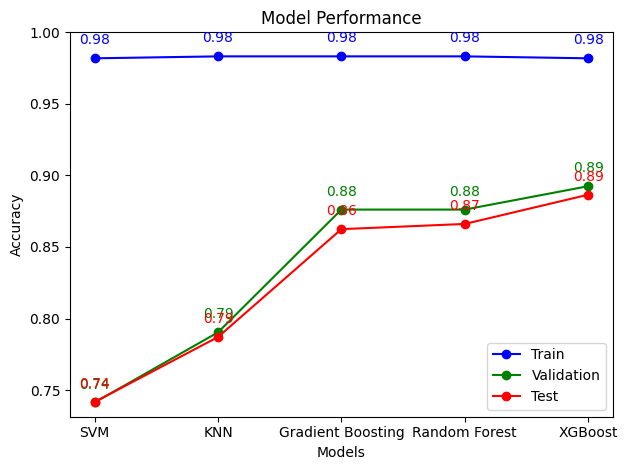

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Create arrays of the data
models = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'KNN', 'SVM']
train_scores = [train_randomForestClassifier, train_gb, train_xgb, train_knn, train_svm]
val_scores = [val_randomForestClassifier, val_gb, val_xgb, val_knn, val_svm]
test_scores = [test_randomForestClassifier, test_gb, test_xgb, test_knn, test_svm]

# Combine the scores and model names into a list of tuples for sorting
data = list(zip(test_scores, train_scores, val_scores, models))

# Sort the data by test_scores (first element of each tuple)
data_sorted = sorted(data, key=lambda x: x[0])

# Unpack the sorted data
test_scores_sorted, train_scores_sorted, val_scores_sorted, models_sorted = zip(*data_sorted)

# Plotting
x = np.arange(len(models_sorted))  # the label locations

fig, ax = plt.subplots()

ax.plot(x, train_scores_sorted, marker='o', label='Train', linestyle='-', color='b')
ax.plot(x, val_scores_sorted, marker='o', label='Validation', linestyle='-', color='g')
ax.plot(x, test_scores_sorted, marker='o', label='Test', linestyle='-', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models_sorted)
ax.legend()

# Set y-axis range to start from a value close to the minimum score
min_score = min(min(train_scores_sorted), min(val_scores_sorted), min(test_scores_sorted))
ax.set_ylim([min_score - 0.01, 1])

# Annotate the points with the actual score values
for i in range(len(models_sorted)):
    ax.annotate(f'{train_scores_sorted[i]:.2f}', (x[i], train_scores_sorted[i]), textcoords="offset points", xytext=(0,10), ha='center', color='b')
    ax.annotate(f'{val_scores_sorted[i]:.2f}', (x[i], val_scores_sorted[i]), textcoords="offset points", xytext=(0,10), ha='center', color='g')
    ax.annotate(f'{test_scores_sorted[i]:.2f}', (x[i], test_scores_sorted[i]), textcoords="offset points", xytext=(0,10), ha='center', color='r')

fig.tight_layout()

plt.show()
